- 事物的哪种特性最有利于预测 ->稳定
- 第一步：预测特征；第二步：特征->得分
- 考虑数据稳定的球队，数据波动大的球队可不预测
- 特征选取时应该考虑波动小、能挖掘出该特征与得分的关系

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_excel("../数据收集/Cleveland Cavaliers.xlsx")
df.head(5)

,GAME_ID,PTS_OFF_TOV,TEAM_NAME,OREB_RANK,OPP_PTS_PAINT_RANK,PFD_RANK,W_RANK,OFF_RATING_RANK,PCT_AST_3PM_RANK,PCT_UAST_FGM_RANK,...,PCT_AST_2PM_RANK,AST_TO_RANK,PTS,PIE,OPP_EFG_PCT_RANK,OREB_PCT,TM_TOV_PCT_RANK,PCT_AST_FGM,STL_RANK,PIE_RANK
0,21601218,11,Cleveland Cavaliers,35,57,45,52,76,51,80,...,2,57,83,0.423,35,0.217,59,0.714,52,68
1,21601205,13,Cleveland Cavaliers,59,57,6,52,47,67,11,...,70,72,121,0.486,44,0.159,76,0.432,28,50
2,21601197,16,Cleveland Cavaliers,5,75,23,52,39,65,57,...,17,44,125,0.475,38,0.271,51,0.622,62,53
3,21601179,14,Cleveland Cavaliers,80,29,65,52,65,29,44,...,25,45,100,0.428,80,0.077,47,0.590,52,67
4,21601169,13,Cleveland Cavaliers,5,49,58,1,31,47,12,...,66,33,114,0.612,14,0.302,16,0.442,28,10


In [4]:
df['OPP_TEAM']=[m[-3:] for m in df['MATCHUP']]
df = df[[col for col in df.columns if "RANK" not in col]]
df.columns

Index(['GAME_ID', 'PTS_OFF_TOV', 'TEAM_NAME', 'PLUS_MINUS', 'AST_PCT', 'FTM',
       'PCT_FGA_3PT', 'AST_RATIO', 'GAME_DATE', 'TEAM_ABBREVIATION', 'FG_PCT',
       'STL', 'REB', 'OPP_OREB_PCT', 'FTA_RATE', 'PCT_UAST_FGM', 'EFG_PCT',
       'PCT_AST_3PM', 'DREB_PCT', 'PTS_PAINT', 'PTS_FB', 'BLK',
       'OPP_PTS_OFF_TOV', 'FT_PCT', 'PFD', 'DREB', 'MIN', 'PCT_PTS_FB',
       'OPP_PTS_2ND_CHANCE', 'PCT_PTS_FT', 'MATCHUP', 'TS_PCT', 'OPP_TOV_PCT',
       'PCT_PTS_2PT', 'PCT_FGA_2PT', 'OPP_FTA_RATE', 'TM_TOV_PCT', 'OREB',
       'TOV', 'OFF_RATING', 'REB_PCT', 'FGA', 'PCT_PTS_OFF_TOV', 'FTA',
       'PCT_PTS_2PT_MR', 'PF', 'PCT_PTS_PAINT', 'PCT_UAST_3PM', 'DEF_RATING',
       'TEAM_ID', 'WL', 'FG3A', 'SEASON_YEAR', 'OPP_EFG_PCT', 'OPP_PTS_FB',
       'OPP_PTS_PAINT', 'PCT_UAST_2PM', 'PCT_AST_2PM', 'NET_RATING', 'AST_TO',
       'PACE', 'AST', 'FGM', 'FG3_PCT', 'PCT_PTS_3PT', 'BLKA',
       'PTS_2ND_CHANCE', 'FG3M', 'PTS', 'PIE', 'OREB_PCT', 'PCT_AST_FGM',
       'OPP_TEAM'],
      dtype='ob

In [5]:
df_group = df.groupby('OPP_TEAM')
df_describe = df_group.describe(include = [np.number])
df_describe

AST                                                       AST_PCT  \
         count       mean        std   min    25%   50%    75%   max   count   
OPP_TEAM                                                                       
ATL        4.0  25.750000   4.573474  21.0  22.50  25.5  28.75  31.0     4.0   
BKN        3.0  24.333333   4.725816  19.0  22.50  26.0  27.00  28.0     3.0   
BOS        4.0  23.000000   4.546061  19.0  19.75  22.0  25.25  29.0     4.0   
CHA        4.0  23.250000   4.193249  17.0  23.00  25.0  25.25  26.0     4.0   
CHI        4.0  22.500000   7.047458  13.0  20.50  23.5  25.50  30.0     4.0   
DAL        2.0  23.500000   9.192388  17.0  20.25  23.5  26.75  30.0     2.0   
DEN        2.0  26.000000   5.656854  22.0  24.00  26.0  28.00  30.0     2.0   
DET        4.0  24.500000   4.203173  19.0  22.75  25.0  26.75  29.0     4.0   
GSW        2.0  15.500000   6.363961  11.0  13.25  15.5  17.75  20.0     2.0   
HOU        2.0  23.000000   1.414214  22.0  22.50  23.0  23.50  24.0     2.0   
IND        4.0  23.750000   4.112988  19.0  22.00  23.5  25.25  29.0     4.0   
LAC        2.0  13.500000   2.121320  12.0  12.75  13.5  14.25  15.0     2.0   
LAL        2.0  24.500000   7.778175  19.0  21.75  24.5  27.25  30.0     2.0   
MEM        2.0  15.500000   7.778175  10.0  12.75  15.5  18.25  21.0     2.0   
MIA        4.0  19.250000   3.304038  15.0  18.00  19.5  20.75  23.0     4.0   
MIL        4.0  21.500000   5.802298  17.0  18.50  19.5  22.50  30.0     4.0   
MIN        2.0  32.000000   7.071068  27.0  29.50  32.0  34.50  37.0     2.0   
NOP        2.0  20.000000   5.656854  16.0  18.00  20.0  22.00  24.0     2.0   
NYK        4.0  25.750000   5.123475  20.0  22.25  26.0  29.50  31.0     4.0   
OKC        2.0  18.000000   5.656854  14.0  16.00  18.0  20.00  22.0     2.0   
ORL        3.0  25.666667   7.505553  17.0  23.50  30.0  30.00  30.0     3.0   
PHI        3.0  24.000000   5.567764  19.0  21.00  23.0  26.50  30.0     3.0   
PHX        2.0  22.000000   9.899495  15.0  18.50  22.0  25.50  29.0     2.0   
POR        2.0  22.000000  11.313708  14.0  18.00  22.0  26.00  30.0     2.0   
SAC        2.0  28.000000   1.414214  27.0  27.50  28.0  28.50  29.0     2.0   
SAS        2.0  22.500000   3.535534  20.0  21.25  22.5  23.75  25.0     2.0   
TOR        4.0  21.750000   2.872281  20.0  20.00  20.5  22.25  26.0     4.0   
UTA        2.0  14.500000   0.707107  14.0  14.25  14.5  14.75  15.0     2.0   
WAS        3.0  23.666667   7.505553  16.0  20.00  24.0  27.50  31.0     3.0   

                    ...      TOV       TS_PCT                             \
              mean  ...      75%   max  count      mean       std    min   
OPP_TEAM            ...                                                    
ATL       0.610000  ...    14.75  17.0    4.0  0.586000  0.095103  0.482   
BKN       0.551000  ...    13.00  14.0    3.0  0.566667  0.041861  0.542   
BOS       0.560500  ...    12.75  18.0    4.0  0.584000  0.068993  0.492   
CHA       0.566250  ...    13.50  18.0    4.0  0.619750  0.077959  0.507   
CHI       0.580000  ...    16.25  20.0    4.0  0.547750  0.046636  0.502   
DAL       0.592000  ...    16.25  17.0    2.0  0.623000  0.066468  0.576   
DEN       0.582000  ...    14.50  16.0    2.0  0.643500  0.033234  0.620   
DET       0.632000  ...    15.25  22.0    4.0  0.592500  0.100205  0.505   
GSW       0.448000  ...    14.25  15.0    2.0  0.478000  0.031113  0.456   
HOU       0.541500  ...    14.00  15.0    2.0  0.657500  0.006364  0.653   
IND       0.568000  ...    16.50  18.0    4.0  0.606000  0.083829  0.491   
LAC       0.449000  ...    16.50  18.0    2.0  0.492500  0.074246  0.440   
LAL       0.537000  ...     9.50  10.0    2.0  0.629500  0.021920  0.614   
MEM       0.462500  ...    16.25  18.0    2.0  0.522000  0.060811  0.479   
MIA       0.483000  ...    18.00  21.0    4.0  0.586250  0.039212  0.540   
MIL       0.578500  ...    17.00  20.0    4.0  0.585500  0.031172  0.554   
MIN   

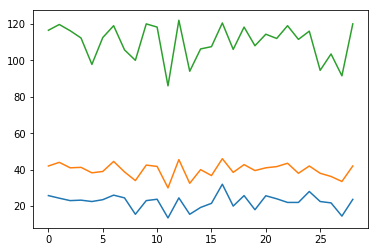

In [6]:
x=range(len(df_describe.index))
plt.plot(x,df_describe['AST']['mean'].get_values(),x,df_describe['FGM']['mean'].get_values(),x,df_describe['PTS']['mean'].get_values())

In [8]:
columns = df_describe.columns.levels[0]
[col for col in columns if df_describe[col]['std'].quantile(0.8)<5 and "PCT" not in col]

['AST_RATIO',
 'AST_TO',
 'BLK',
 'BLKA',
 'FG3M',
 'FTA_RATE',
 'MIN',
 'OPP_FTA_RATE',
 'OREB',
 'PACE',
 'PF',
 'PFD',
 'PIE',
 'STL',
 'TEAM_ID',
 'TOV']